# MNIST Classification test using a 4-dimensional quasiorthogonal basis

In [1]:
import requests
import math
import numpy
from helpers.basis_helper import parse_basis, normalize
from helpers.tf_qsoftmax import qsoftmax

In [2]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

## Construct a quasiorthogonal basis.
This QO basis has 12 vectors in 4 dimensions, minimum mutual angle is about 60$^\circ$. The basis is constructed from the spherical code from nielsloane.com. We take only the 10 vectors we need

In [3]:
r = requests.get("http://neilsloane.com/packings/dim4/24cell.4.24.txt")
qo_4_12 = parse_basis(r.text.split('\n')[0:24])
qo_4 = numpy.array(qo_4_12[0:10], dtype=numpy.float32)
basis4 = normalize(qo_4)

#### Let's build and train our model
This is the same architecture except we have an output of 4 dimensions and apply the qsoftmax function as the activation function

In [4]:
qo4_model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(4),
    tf.keras.layers.Lambda(qsoftmax(basis4))
])

In [5]:
qo4_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [6]:
qo4_model.fit(x_train,
              y_train,
              epochs=20,
              validation_data=(x_test, y_test),
              verbose=0)

## We display some results
### The validation loss tells us how well the training went

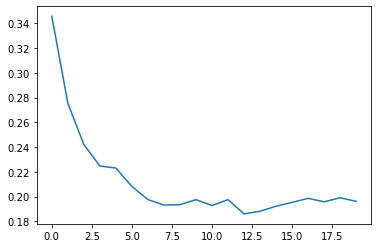

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display, Markdown

plt.plot(qo4_model.history.history['val_loss'])

### Print the final results in big bold text

In [8]:
text = "The accuracy is {:4.3f}% for the test set and {:4.3f}% for the training set".format(
    qo4_model.history.history['val_accuracy'][-1]*100,
    qo4_model.history.history['accuracy'][-1]*100)
display(Markdown(f"# {text}"))

# The accuracy is 95.850% for the test set and 96.150% for the training set

In [9]:
text

'The accuracy is 95.850% for the test set and 96.150% for the training set'